In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline
sns.set()

In [2]:
df_content = pd.read_csv('../data/feature/sentiws_content.csv')
df_comment = pd.read_csv('../data/feature/sentiws_comment.csv')
df_content_knn = pd.read_csv('../data/feature/knn_clustering.csv')
print(df_content.shape)
print(df_comment.shape)
print(df_content_knn.cluster_value.values)

(103, 3)
(127612, 6)
[6 1 4 5 3 4 0 3 0 3 3 6 5 5 6 5 5 0 5 5 4 2 4 1 5 4 4 0 0 5 2 6 3 3 0 5 5
 2 0 2 3 1 3 0 6 3 3 5 5 5 6 3 3 3 4 3 4 7 5 0 3 6 3 3 6 7 7 7 3 3 5 1 4 3
 0 1 6 4 1 0 4 1 4 4 1 0 4 6 3 4 5 6 6 6 7 3 4 3 5 6 6 5 0]


In [3]:
df_content['publishingDate'] = pd.to_datetime(df_content['publishingDate'])

df_comment1 = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], on="ID_GodotObject")

df_comment1.sort_values(by='publishingDate', ascending = True, inplace=True)
df_comment1['year'] = df_comment1['publishingDate'].dt.year
df_comment1['month'] = df_comment1['publishingDate'].dt.month

df_comment1 = df_comment1.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
df_comment1['year/month'] = df_comment1['year'].astype(str) + '/' + df_comment1['month'].astype(str)

C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\1585575956.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_comment1 = df_comment1.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()


C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\1391537372.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_comment1 = df_comment1.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()


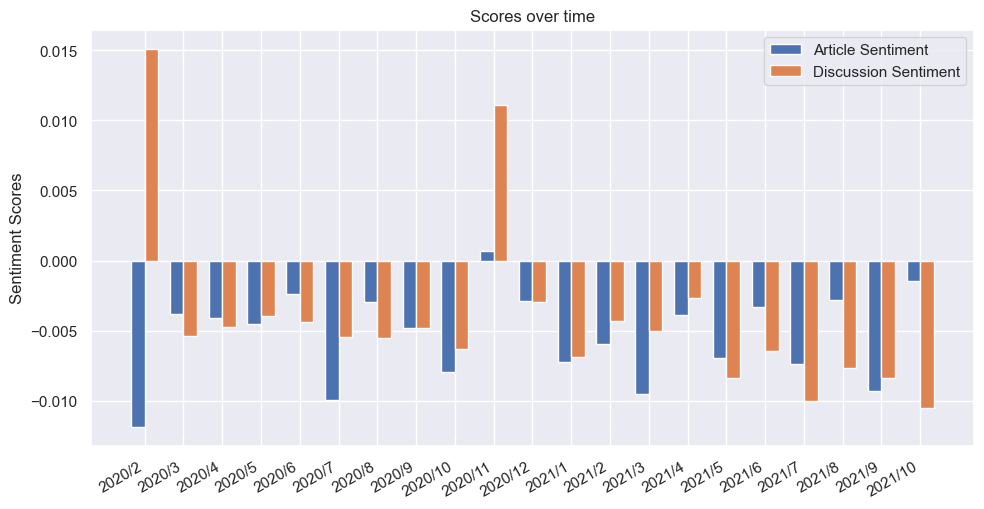

In [4]:
df_content['publishingDate'] = pd.to_datetime(df_content['publishingDate'])

df_comment1 = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], on="ID_GodotObject")

df_comment1.sort_values(by='publishingDate', ascending = True, inplace=True)
df_comment1['year'] = df_comment1['publishingDate'].dt.year
df_comment1['month'] = df_comment1['publishingDate'].dt.month

df_comment1 = df_comment1.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
df_comment1['year/month'] = df_comment1['year'].astype(str) + '/' + df_comment1['month'].astype(str)

x = np.arange(len(df_comment1['year/month']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, df_comment1['sentiment_score'], width, label='Article Sentiment')
rects2 = ax.bar(x + width/2, df_comment1['overal_sentiment'], width, label='Discussion Sentiment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment Scores')
ax.set_title('Scores over time')
ax.set_xticks(x, df_comment1['year/month'])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.savefig("sentiws_time.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7]


C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\3357410260.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\3357410260.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\3357410260.py:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\3357410260.py:27: FutureWarning: Indexing with mul

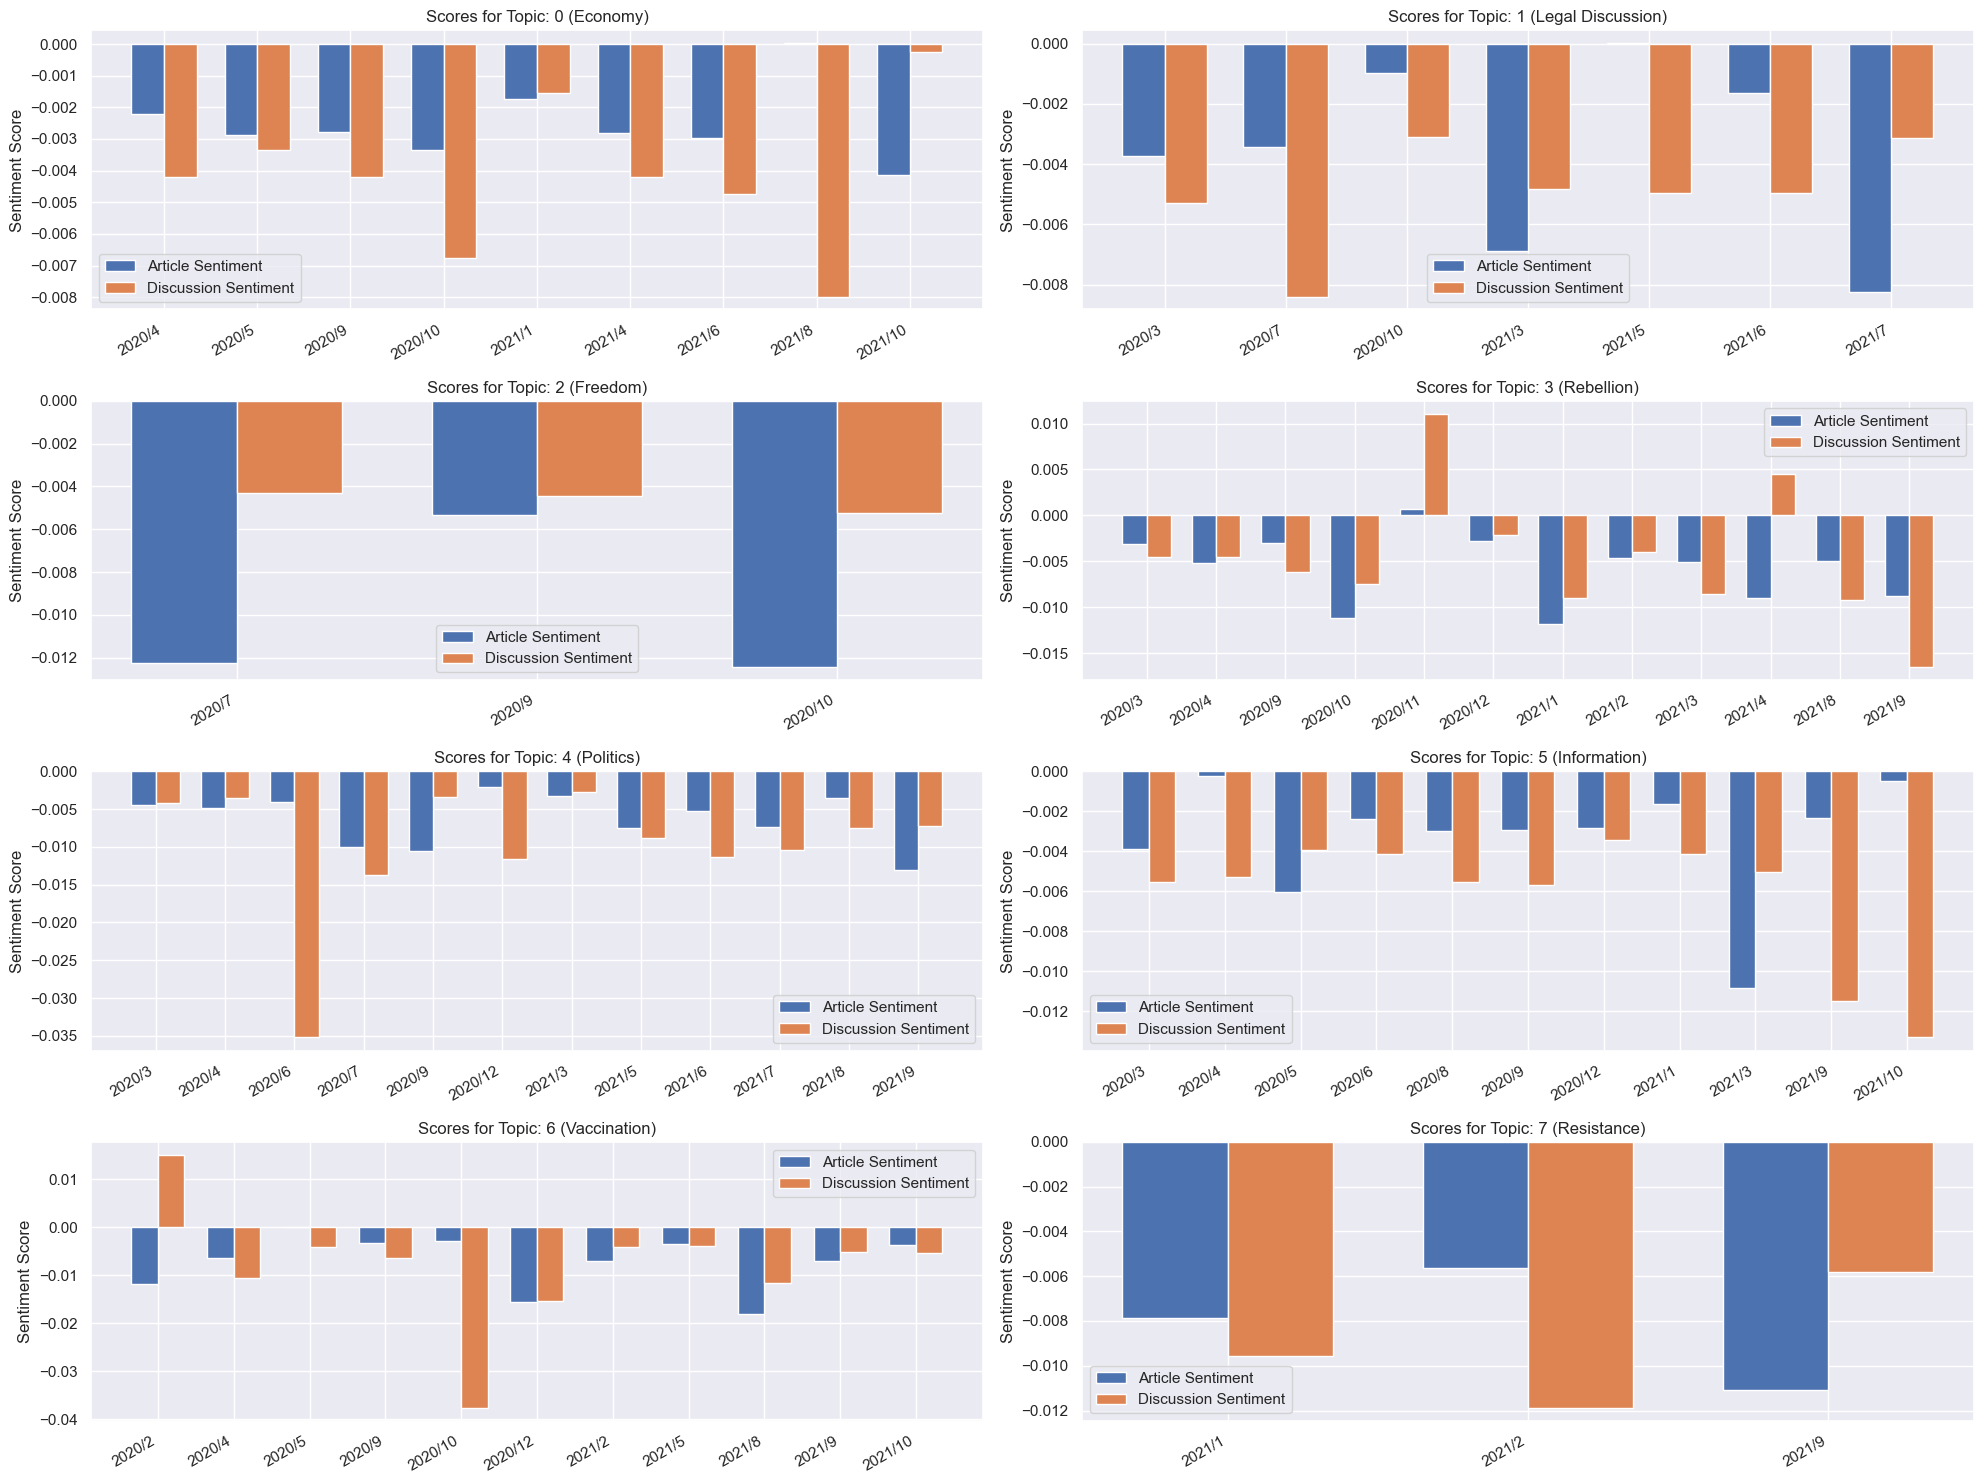

In [5]:
#Build sentiment plot for each cluster
cluster_topics = {0:'Economy',1:'Legal Discussion',2:'Freedom',
                  3:'Rebellion',4:'Politics',5:'Information',6:'Vaccination',7:'Resistance'}


clusters = [i for i in range(0,max(df_content_knn.cluster_value.values) + 1)]
print(clusters)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    #check if ax index is cluster index
    if i not in clusters:
        continue;
    
    df_c = df_content_knn[df_content_knn['cluster_value'] == i]
    df_c = pd.merge(df_c, df_content[['publishingDate','ID_GodotObject','sentiment_score']],on="ID_GodotObject")
    df_c = pd.merge(df_c,df_comment ,on="ID_GodotObject")
    df_c['publishingDate'] = pd.to_datetime(df_c['publishingDate'])
    df_c.sort_values(by='publishingDate', ascending = True, inplace=True)
    
    df_c['year'] = df_c['publishingDate'].dt.year
    df_c['month'] = df_c['publishingDate'].dt.month

    #calculate mean for each period
    df_c = df_c.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
    df_c['year/month'] = df_c['year'].astype(str) + '/' + df_c['month'].astype(str)
    x = np.arange(len(df_c['year/month']))  # the label locations
    width = 0.35  # the width of the bars
    
    rects1 = ax.bar(x - width/2, df_c['sentiment_score'], width, label='Article Sentiment')
    rects2 = ax.bar(x + width/2, df_c['overal_sentiment'], width, label='Discussion Sentiment')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Sentiment Score')
    #axs[0].set_ylabel("avg. Sentiment Scores")  # set y-axis label for all subplots
    ax.set_title('Scores for Topic: ' + str(i) + ' (' + cluster_topics[i] + ')' )
    ax.set_xticks(x, df_c['year/month'], rotation=30, ha='right')
    ax.legend(loc='best')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)
    #plt.xticks(rotation=30, ha='right')
    
fig.tight_layout()
plt.savefig("sentiws_topic_time.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()

    



In [6]:
#Build sentiment plot for each cluster
'''
cluster_topics = {0:'Economy',1:'Legal Discussion',2:'Freedom',3:'Rebellion',4:'Politics',5:'',6:'',7:''}


clusters = [i for i in range(0,max(df_content_knn.cluster_value.values) + 1)]
print(clusters)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
axs = axs.flatten()

for i, ax in enumerate(axs):
    #check if ax index is cluster index
    if i not in clusters:
        continue;
    
    df_c = df_content_knn[df_content_knn['cluster_value'] == i]
    df_c = pd.merge(df_c, df_content[['publishingDate','ID_GodotObject','sentiment_score']],on="ID_GodotObject")
    df_c = pd.merge(df_c,df_comment ,on="ID_GodotObject")
    df_c['publishingDate'] = pd.to_datetime(df_c['publishingDate'])
    df_c.sort_values(by='publishingDate', ascending = True, inplace=True)
    
    df_c['year'] = df_c['publishingDate'].dt.year
    df_c['month'] = df_c['publishingDate'].dt.month

    #calculate mean for each period
    df_c = df_c.groupby(['year','month'])['sentiment_score','overal_sentiment'].mean().reset_index()
    df_c['year/month'] = df_c['year'].astype(str) + '/' + df_c['month'].astype(str)
    x = np.arange(len(df_c['year/month']))  # the label locations
    width = 0.35  # the width of the bars
    
    rects1 = ax.bar(x - width/2, df_c['sentiment_score'], width, label='Article Sentiment')
    rects2 = ax.bar(x + width/2, df_c['overal_sentiment'], width, label='Discussion Sentiment')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Sentiment Score')
    #axs[0].set_ylabel("avg. Sentiment Scores")  # set y-axis label for all subplots
    ax.set_title('Scores for Topic: ' + str(i) + ' )
    ax.set_xticks(x, df_c['year/month'], rotation=30, ha='right')
    ax.legend(loc='best')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)
    #plt.xticks(rotation=30, ha='right')
    
fig.tight_layout()
plt.savefig("sentiws_topic_time.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()
'''
    



'\ncluster_topics = {0:\'Economy\',1:\'Legal Discussion\',2:\'Freedom\',3:\'Rebellion\',4:\'Politics\',5:\'\',6:\'\',7:\'\'}\n\n\nclusters = [i for i in range(0,max(df_content_knn.cluster_value.values) + 1)]\nprint(clusters)\n\nfig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))\naxs = axs.flatten()\n\nfor i, ax in enumerate(axs):\n    #check if ax index is cluster index\n    if i not in clusters:\n        continue;\n    \n    df_c = df_content_knn[df_content_knn[\'cluster_value\'] == i]\n    df_c = pd.merge(df_c, df_content[[\'publishingDate\',\'ID_GodotObject\',\'sentiment_score\']],on="ID_GodotObject")\n    df_c = pd.merge(df_c,df_comment ,on="ID_GodotObject")\n    df_c[\'publishingDate\'] = pd.to_datetime(df_c[\'publishingDate\'])\n    df_c.sort_values(by=\'publishingDate\', ascending = True, inplace=True)\n    \n    df_c[\'year\'] = df_c[\'publishingDate\'].dt.year\n    df_c[\'month\'] = df_c[\'publishingDate\'].dt.month\n\n    #calculate mean for each period\n    df_c = d

C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\412133486.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_overall = df_overall.groupby(['cluster_value'])['sentiment_score','overal_sentiment'].mean().reset_index()


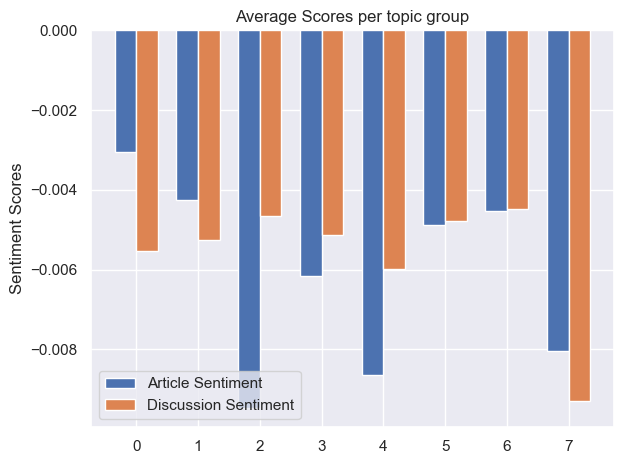

In [7]:
#see overall differences between article and comment sentiment
df_overall = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], 
                      on="ID_GodotObject")
df_overall = pd.merge(df_overall, df_content_knn, on="ID_GodotObject")
df_overall = df_overall.groupby(['cluster_value'])['sentiment_score','overal_sentiment'].mean().reset_index()

x = np.arange(len(df_overall['cluster_value']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_overall['sentiment_score'], width, label='Article Sentiment')
rects2 = ax.bar(x + width/2, df_overall['overal_sentiment'], width, label='Discussion Sentiment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment Scores')
ax.set_title('Average Scores per topic group')
ax.set_xticks(x, df_overall['cluster_value'])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.xticks(rotation=30, ha='right')
plt.savefig("sentiws_topic.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()


In [8]:
#find interesting articles
df_comments2 = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], on="ID_GodotObject")
df_comments2 = df_comments2.groupby(['ID_GodotObject'])['sentiment_score','overal_sentiment'].mean().reset_index()

# t test using scipy
a =  df_comments2['sentiment_score'].to_numpy()
# use parameter "alternative" for two-sided or one-sided test
result = st.ttest_1samp(a=a, popmean=0.015135)
articles = []
alpha = 0.05 * 10**(-50)
for row in df_comments2.itertuples():
    ttest = st.ttest_1samp(a=a, popmean=row.overal_sentiment)
    if ttest.pvalue < alpha:
        articles.append(row.ID_GodotObject)
        
        
df_text = pd.read_csv('../data/p_content.csv')
print('articles found',len(articles))
df_comments3 = df_comments2[df_comments2['ID_GodotObject'].isin(articles)]
df_comments3 = pd.merge(df_comments3, df_text[['publishingDate', 'ID_GodotObject', 'merged_text']])
df_comments3.to_csv('../data/feature/content_interesting.csv', encoding='utf-8', index=False)
df_comments3.head()

C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_15580\61455215.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_comments2 = df_comments2.groupby(['ID_GodotObject'])['sentiment_score','overal_sentiment'].mean().reset_index()


articles found 6


,ID_GodotObject,sentiment_score,overal_sentiment,publishingDate,merged_text
0,2000115059032,-0.011892,0.015135,2020-02-26 16:50:27.000,﻿20sars-cov-2maskenpflicht medizinisch_Persona...
1,2000118306572,-0.004091,-0.035188,2020-06-25 10:48:12.000,﻿20 genießen Verantwortung Urlaub beachten sol...
2,2000121095270,-0.002809,-0.037778,2020-10-21 11:32:27.000,﻿20bundesländerübersichtverschärfte Maßnahme a...
3,2000121671795,0.000698,0.011095,2020-11-12 21:55:36.000,﻿20_Coronavirus corona -ampel Österreich bleib...
4,2000122789852,0.001779,-0.020376,2020-12-27 14:00:32.000,﻿20harter Lockdown einzeln Skigebiet Steiermar...


0 scores:  88010
not 0 scores:  39602


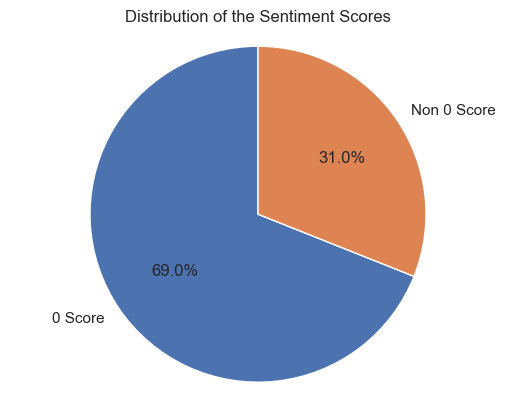

In [9]:
x = df_comment[df_comment['overal_sentiment'] == 0]
x1 = df_comment[df_comment['overal_sentiment'] != 0]
xl = len(x) / (len(x) + len(x1))
x1l = len(x1) / (len(x) + len(x1))
print('0 scores: ', len(x))
print('not 0 scores: ', len(x1))
labels = '0 Score', 'Non 0 Score'
sizes = [xl, x1l]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of the Sentiment Scores')
plt.savefig("sentiws_dist.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()

https://ourworldindata.org/coronavirus/country/austria
for overall Corona Infection data

In [10]:
#preprocessing of corona data

#corona=pd.read_csv('../../owid-covid-data.csv')
#corona = corona[corona['location']=='Austria'][['date','new_deaths_smoothed','new_cases_smoothed']]
#corona.date = pd.to_datetime(corona.date)
#corona.dropna(inplace=True)
#corona.sort_values(by='date', ascending = True, inplace = True) 
#start_date = "2020-01-01"
#end_date = "2021-10-30"

#corona = corona[(corona["date"] >= start_date) & (corona["date"] <= end_date)]

#corona.to_csv('../data/austria-covid.csv', index=False)
#print(corona.dtypes)
#print(corona.shape)
#corona.head()



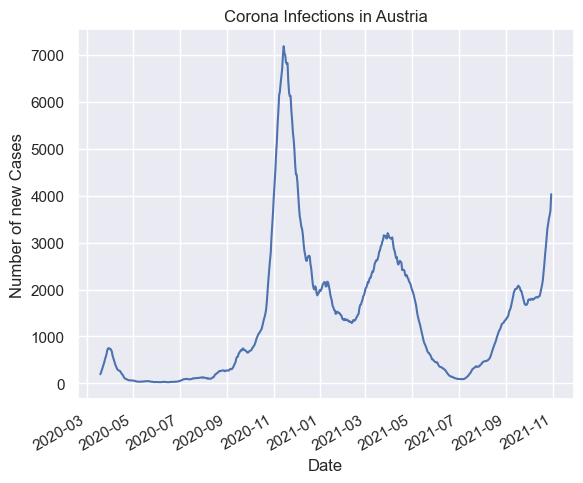

In [11]:
corona = pd.read_csv('../data/austria-covid.csv')
corona.date = pd.to_datetime(corona.date)
# Set the date as the x-axis
x = corona['date']

# Set the total cases and new cases as the y-axis
y1 = corona['new_deaths_smoothed']
y2 = corona['new_cases_smoothed']

# Plot the line chart
#plt.plot(x, y1, label='New Deaths')
plt.plot(x, y2, label='New Cases')

# Add the labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Number of new Cases')
plt.title('Corona Infections in Austria')
plt.xticks(rotation=30, ha='right')
#plt.legend()
plt.savefig("corona_cases.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
# Show the plot
plt.show()

In [12]:
## indicate interesting time intervals for topic analysis
